In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import pickle

In [2]:
url = 'https://raw.githubusercontent.com/joanlenczuk/Titanic---ML-Project/master/titanic_data.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Creating a new data frame which doesn't contain certain columns which appear to be insignificant 
#for predicting whether a person would have survived on Titanic
new_titanic = titanic.drop(columns = ['PassengerId', 'Name', 'Ticket',
                                      'Fare', 'Embarked', 'Cabin'])
new_titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,NaN,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [4]:
df = pd.DataFrame(new_titanic)

In [5]:
#The data frame contains nan values in the Age column and it's important to check if the number of nans is big
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [6]:
#Because there are 177 nans it's better to fill them rather than drop the raws with nan in the Age column
#Nans will be filled by average age for females and males
mean_age_f = df["Age"][df["Sex"] == 'female'].mean()
mean_age_m = df["Age"][df["Sex"] == 'male'].mean()
print(round(mean_age_f),round(mean_age_m))

28 31


In [7]:
#Filling the nans with the mean of age for each sex
df.loc[df['Sex'] == 'female','Age'] = df.loc[df['Sex'] == 'female', 'Age'].fillna(mean_age_f)
df.loc[df['Sex'] == 'male','Age'] = df.loc[df['Sex'] == 'male', 'Age'].fillna(mean_age_m)

In [8]:
# double checking if all of the nans have been filled
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [9]:
# chosing the "Sex" column to encode it
encoder = LabelEncoder()
sex_category = df.loc[:, 'Sex']
sex_category.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [10]:
encoder.fit(sex_category)

LabelEncoder()

In [11]:
#changing values in the Sex column into binarized values
binarized_cat = encoder.transform(sex_category)
binarized_cat

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [12]:
# replacing values in Sex column with the binarized values, where 1 is male and 0 is female
df["Sex"] = binarized_cat
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [13]:
#splitting the data frame into the feature vector (X) and target variables (y)
X = df.drop(columns="Survived")
y = df.loc[:, "Survived"]

In [14]:
#splitting he data into training (80%) and testing (20%) data and checking if it was done correctly
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
print("Training data:", train_X.shape, train_y.shape)
print("Testing data:", test_X.shape, test_y.shape)

Training data: (712, 5) (712,)
Testing data: (179, 5) (179,)


In [15]:
#making a decision tree
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
predicted_y = tree.predict(test_X)
predicted_y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [17]:
#checking the precision of the model
precision = precision_score(test_y, predicted_y, average="micro")
print(f" Precision: {precision.round(2)}")

 Precision: 0.77


In [18]:
#Name of classes that will be predicted
titanic_feature_names = X.columns
titanic_class_names = ["Survived", "Not survived"]

print("Features:", titanic_feature_names)
print("Classes:", titanic_class_names)

Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')
Classes: ['Survived', 'Not survived']


In [19]:
#visualisation of the tree
data = StringIO()
export_graphviz(
    tree,
    out_file=data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=titanic_feature_names,
    class_names = titanic_class_names)
graph = pydotplus.graph_from_dot_data(data.getvalue())

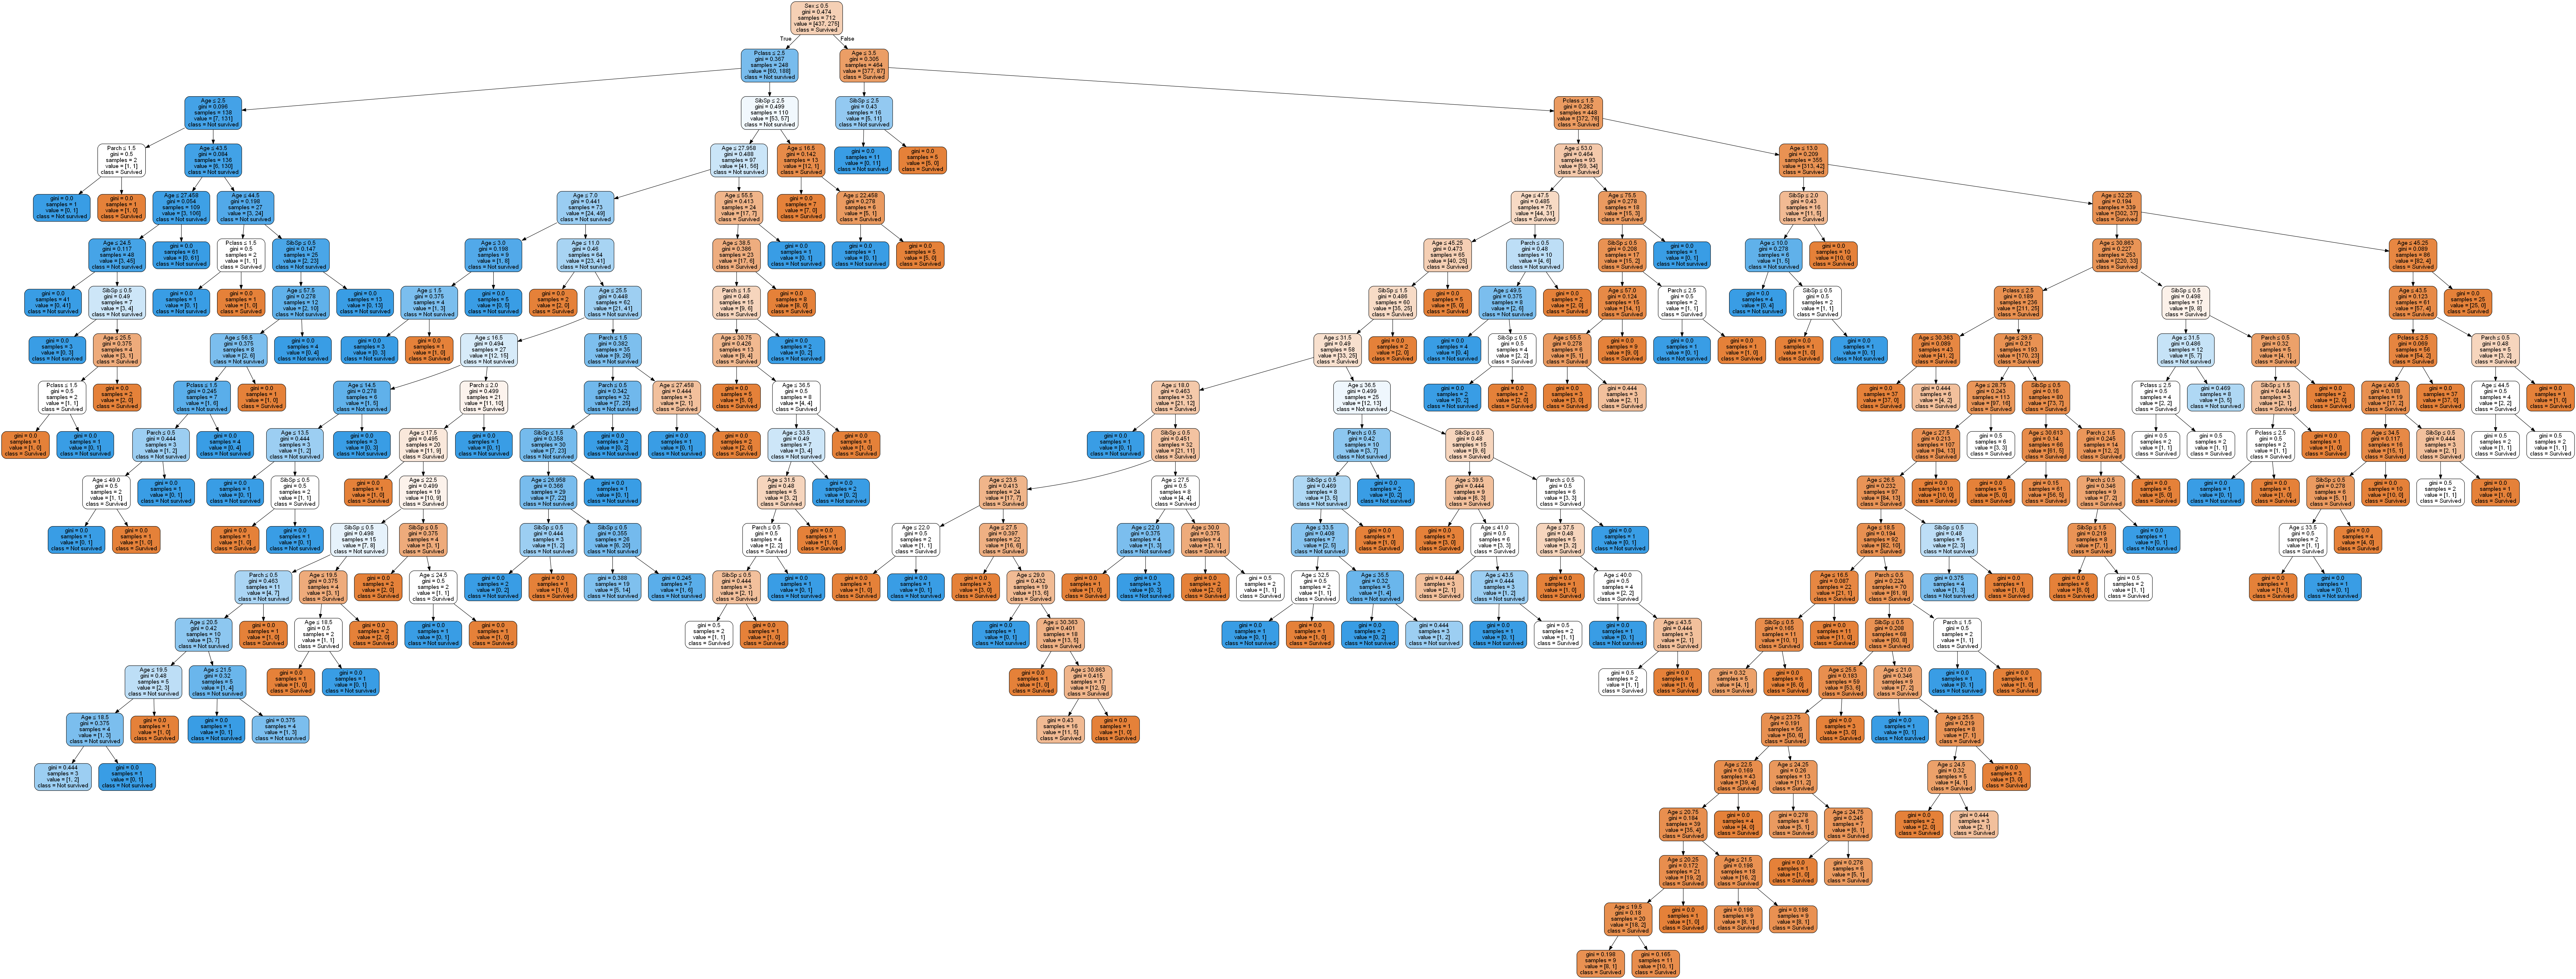

In [20]:
Image(graph.create_png())

In [21]:
model = (encoder, tree)

In [22]:
#storing the model
with open("model_titanic.pkl", "wb") as model_file:
  pickle.dump(model, model_file)

In [23]:
with open("model_titanic.pkl", "rb") as model_file:
  unpickled_model = pickle.load(model_file)
  unpickled_model

In [24]:
encoder, tree = unpickled_model